In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Collecting and preprocessing

In [87]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [88]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


The given dataset contains the price of gold from 2008-2018 

This dataset will contain 6 variables as follows:

1. Date: date for which market data is collected.

2. SPX: Standard & Poor's market-capitalization-weighted index of 500 leading publicly traded companies in the U.S.

3. GLD: SPDR Gold Shares ETF.

4. USO: The United States Oil Fund, ETF.

5. SLV: Silver ETF. Purely reflects the price movements of silver.

6. EUR/USD: euro against U.S. dollar pair.

In [89]:
df.shape # no of rows and columns

(2290, 6)

In [90]:
df.describe() #statiscal descriptions of the dataset

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [91]:
df.info() #information about the columns and rows and every observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [92]:
df.isnull().sum() #checking for null values in the dataset

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation factors 

In [93]:
correlation = df.corr () #finding the correaltion of features for the dataset

<AxesSubplot:>

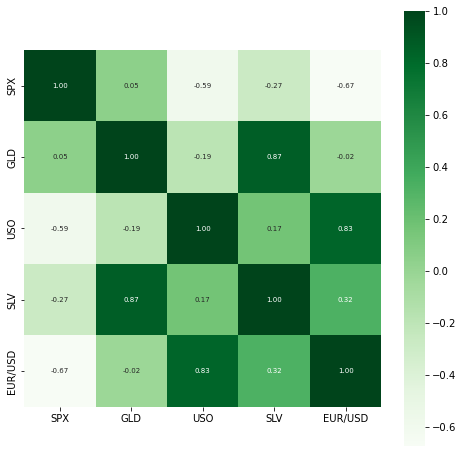

In [94]:
#plotting a heat map to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':7}, cmap='Greens')

In [95]:
#correaltion values of gold as it is the target

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


From this we can anlyze that silver is highly correlated with gold , if price of gold rises most propably silver is expected to rise .
The USO and price are slightly negatively correalted

C:\Users\Rengalakshmanan S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

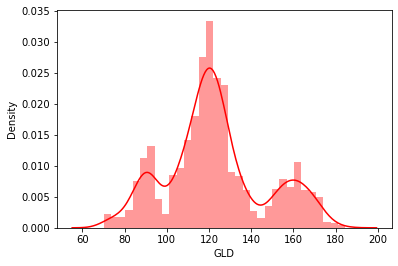

In [96]:
#check the distribution of the gold price using dist plot

sns.distplot(df['GLD'],color='Red')

From this distribution , we can see that most of the gold price ranges between 100 to 140 and there is a bump between 80 to 100 and 150 to 170.

In [105]:
#model building
#splitting the features;

X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']


In [106]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [107]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [109]:
len(X_train)

1832

In [110]:
len(X_test)

458

In [111]:
len(y_train)

1832

In [112]:
len(y_test)

458

Model training : Random Forest Regressor


In [113]:
regressor = RandomForestRegressor(n_estimators=100)

In [114]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()



Model evaluation

In [115]:
#prediction on test data

test_data_prediction = regressor.predict(X_test)

In [116]:
print(test_data_prediction)

[168.42239929  82.09769981 116.14019983 127.65960068 120.73000142
 154.77689786 150.27829859 126.12590003 117.48119886 125.83990071
 116.5454007  171.53170089 141.16799856 168.01809844 115.07449994
 117.37260065 138.2017035  169.76360027 159.680203   158.63849877
 155.25670041 125.17070061 177.17249934 157.61450334 125.28180069
  93.70389975  77.1694004  120.73120018 119.10279928 167.50800015
  88.13950059 125.35680027  91.07860055 117.82140005 121.06939946
 136.57800129 115.44190158 115.36010075 148.01489972 107.12030091
 104.49040244  87.16639796 126.42290021 117.97379987 154.48259917
 119.67829993 108.43359963 107.99489828  93.4073007  127.02089791
  74.9207002  113.71519913 121.13950001 111.2282997  118.86129893
 120.62979941 159.50760003 167.18360197 147.14669611  85.87289882
  94.40510027  86.77619899  90.51690032 119.05960068 126.49420037
 127.43440009 168.49309943 122.30169961 117.53219899  98.5391003
 168.03600164 142.96889911 132.01940217 121.1359022  121.19699926
 119.499800

let's try some input giving and look at the results

In [122]:
regressor.predict([[18576.160034,  78.370003 , 15.2850 , 1.474491]])

C:\Users\Rengalakshmanan S\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([121.91089914])

In [125]:
#r squared error

error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error is ", error_score)

R squared error is  0.9900588991362393


Compare the Actual Values and Predicted Values in a Plot


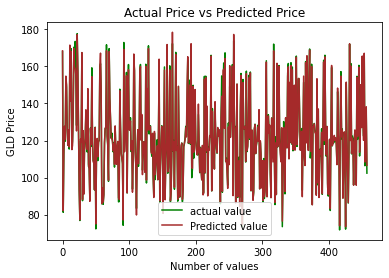

In [131]:
plt.plot(Y_test,color='green', label='actual value')
plt.plot(test_data_prediction, color= 'brown', label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [133]:
regressor.score(X_test,Y_test)

0.9900588991362393

from this we can assume that most propably the predicted values match the actual values.
Hurray !! we predicted.